### Import data

In [1]:
include("importData.jl")
include("DDEmodel.jl")
include("plot.jl")

# import data

# lapatinib
conc_l, pop_l, g2_l, g1_l, g1_0_l, g2_0_l = setup_data("lapatinib");

┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, ::Colon, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = get_data(::String, ::String) at importData.jl:29
└ @ Main /home/farnazm/dde/dde-constant-delay/DrugResponseModel.jl/src/importData.jl:29
┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, ::Colon, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = get_data(::String, ::String) at importData.jl:37
└ @ Main /home/farnazm/dde/dde-constant-delay/DrugResponseModel.jl/src/importData.jl:37


### Estimate 

In [2]:
# initial guess
initial_guess  = [0.02798, 0.025502, 21.3481, 10.2881, 0.0001, 0.0001]

# bounds 
lower_bnd = [-6.0, -6.0, 2.0, 2.0, -8.0, -8.0]
upper_bnd = [0.0, 0.0, 6.0, 6.0, 0.0, 0.0]
# bound = collect(zip(lower_bnd, upper_bnd))
j = 8
# max number of steps
maxSteps = 1e4
best_fit, parameters = optimization(g1_l, g2_l, g1_0_l, g2_0_l, initial_guess, j, lower_bnd, upper_bnd, maxSteps)

blackbox optim begins ...
Starting optimization with optimizer DiffEvoOpt{FitPopulation{Float64},RadiusLimitedSelector,BlackBoxOptim.AdaptiveDiffEvoRandBin{3},RandomBound{ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps

Optimization stopped after 10001 steps and 20.02 seconds
Termination reason: Max number of steps (10000) reached
Steps per second = 499.51
Function evals per second = 505.65
Improvements/step = 0.16530
Total function evaluations = 10124


Best candidate found: [-4.32215, -3.17268, 3.66928, 2.00004, -5.55037, -3.40102]

Fitness: 712.640884378

fitness before local optimization:  
712.6408843782763


(712.6408843782763, [0.013271259124854157, 0.04189110589669711, 39.223763550295075, 7.389334897095702, 0.003886038020898371, 0.03333921371517779])

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = plotIt(::Array{Float64,1}, ::Int64, ::String, ::Symbol) at plot.jl:34
└ @ Main /home/farnazm/dde/dde-constant-delay/DrugResponseModel.jl/src/plot.jl:34


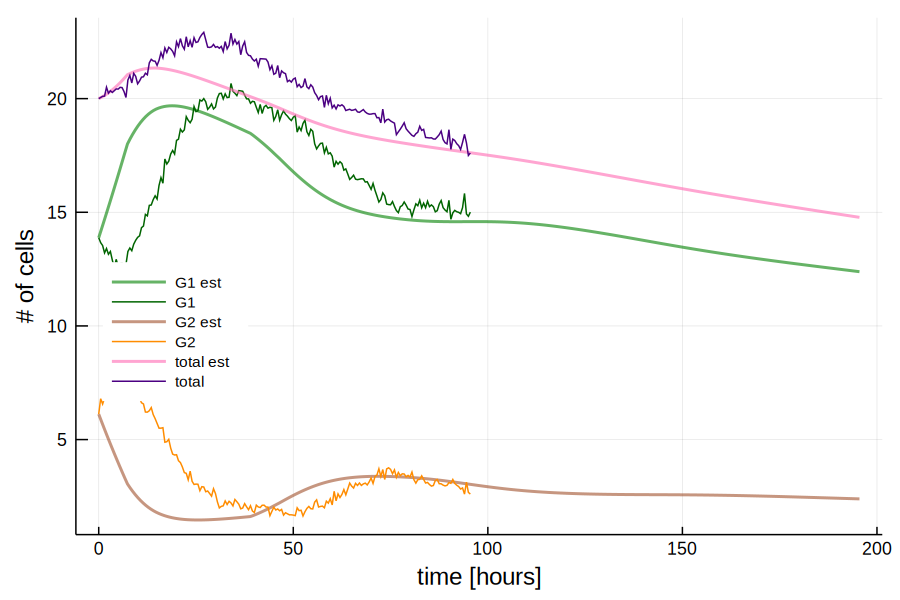

In [3]:
# j showas the trial number, which could be from 1:control, ..., 8: maximum drug concentraation
j = 8
plotIt(parameters, j, "lapatinib", :left)